# ĐỀ THI THỬ NHẬP MÔN AI

#MSSV: 2374802010571
#HỌ VÀ TÊN: Nguyễn Hạn Vũ

# CÂU 1: TÌM DFS THEO ĐỒ THỊ BÊN DƯỚI BẰNG PYTHON

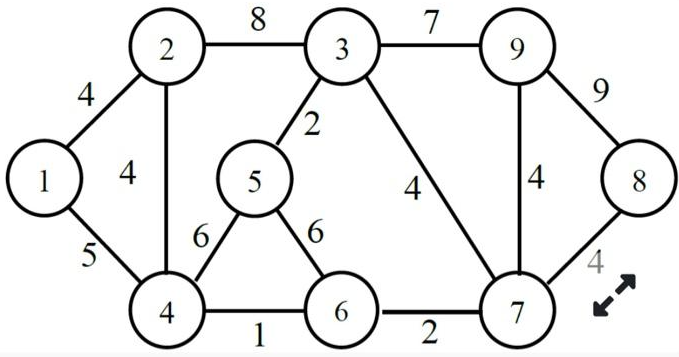

In [4]:
#CODE HERE
def dfs_weighted(graph, start, goal, visited=None, path=None, total_weight=0):
    # Khởi tạo tập đã thăm và đường đi nếu chưa có
    if visited is None:
        visited = set()
    if path is None:
        path = [start]
    
    # Thêm nút hiện tại vào tập đã thăm
    visited.add(start)
    # Kiểm tra nếu nút hiện tại là đích
    if start == goal:
        return path, total_weight
    
    # Duyệt qua các nút kề và trọng số tương ứng
    for neighbor, weight in graph[start]:
        # Nếu nút kề chưa được thăm
        if neighbor not in visited:
            # Gọi đệ quy DFS trên nút kề với đường đi và tổng trọng số mới
            new_path, new_weight = dfs_weighted(graph, neighbor, goal, visited, path + [neighbor], total_weight + weight)
            # Nếu tìm thấy đường đi, trả về
            if new_path:
                return new_path, new_weight
    # Trả về None và 0 nếu không tìm thấy đường đi
    return None, 0

# Định nghĩa Đồ thị mẫu 5 (có trọng số)
graph5 = {
    '1': [('2', 4), ('4', 5)],
    '2': [('1', 4), ('4', 4), ('3', 8)],
    '3': [('2', 8), ('5', 2), ('9', 7),('7',4)],
    '4': [('1', 5), ('2', 4), ('5', 6), ('6', 1)],
    '5': [('4', 6), ('3', 2), ('6', 6)],
    '6': [('4', 1), ('5', 6), ('7', 2)],
    '7': [('6', 2), ('8', 4), ('9', 4),('3',4)],
    '8': [('7', 4), ('9', 9)],
    '9': [('3', 7), ('7', 4), ('8', 9)]
}


# Chạy DFS và in kết quả
path, weight = dfs_weighted(graph5, '1', '9')
print("Đường đi DFS trên Đồ thị mẫu 5:", path, "Tổng trọng số:", weight)

Đường đi DFS trên Đồ thị mẫu 5: ['1', '2', '4', '5', '3', '9'] Tổng trọng số: 23


# CÂU 2: Tối ưu hóa hàm một biến

Tìm $x$ sao cho  
$$
f(x) = -(x^2) + 10x + 50
$$  
đạt giá trị lớn nhất trong khoảng  
$$
x \in [0, 10].
$$

In [ ]:
# CODE HERE
import numpy as np
import random
import matplotlib.pyplot as plt

# Hàm mục tiêu
def fitness_function(x):
    return -(x**2) + 10*x + 50

# Khởi tạo quần thể
def initialize_population(pop_size, min_val, max_val):
    return [random.uniform(min_val, max_val) for _ in range(pop_size)]

# Lựa chọn (Tournament Selection)
def select_parents(population, fitness_values, tournament_size=3):
    selected = random.sample(range(len(population)), tournament_size)
    best_idx = max(selected, key=lambda i: fitness_values[i])
    return population[best_idx]

# Lai ghép
def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        return (parent1 + parent2) / 2
    return parent1

# Đột biến
def mutate(individual, mutation_rate=0.1, min_val=0, max_val=10):
    if random.random() < mutation_rate:
        return random.uniform(min_val, max_val)
    return individual

# Thuật toán di truyền
def genetic_algorithm_example1(pop_size=50, generations=100, min_val=0, max_val=10):
    population = initialize_population(pop_size, min_val, max_val)
    best_fitness_history = []
    
    for generation in range(generations):
        fitness_values = [fitness_function(x) for x in population]
        best_fitness = max(fitness_values)
        best_fitness_history.append(best_fitness)
        
        new_population = []
        for _ in range(pop_size):
            parent1 = select_parents(population, fitness_values)
            parent2 = select_parents(population, fitness_values)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population
        best_individual = population[np.argmax([fitness_function(x) for x in population])]
        print(f'Thế hệ {generation + 1}: x = {best_individual:.4f}, f(x) = {best_fitness:.4f}')
    
    best_fitness = max([fitness_function(x) for x in population])
    best_individual = population[np.argmax([fitness_function(x) for x in population])]
    
    # Trực quan hóa
    plt.plot(range(generations), best_fitness_history)
    plt.xlabel('Thế hệ')
    plt.ylabel('Giá trị f(x) tốt nhất')
    plt.title('Sự thay đổi của f(x) qua các thế hệ')
    plt.show()
    
    return best_individual, best_fitness

# Chạy thuật toán
best_x, best_f = genetic_algorithm_example1()
print(f'\nKết quả cuối cùng: x = {best_x:.4f}, f(x) = {best_f:.4f}')

# CÂU 3: SỬ DỤNG MÔ HÌNH CNN ĐỂ PHÂN LOẠI DỮ LIỆU CHÓ VÀ MÈO TỪ DATA: 

https://www.kaggle.com/c/dogs-vs-cats/data

✅ Đã chia ảnh vào thư mục cat/ và dog/
Epoch 1, Loss: 0.5982
Epoch 2, Loss: 0.5013
Epoch 3, Loss: 0.4405
Epoch 4, Loss: 0.3975
Epoch 5, Loss: 0.3537


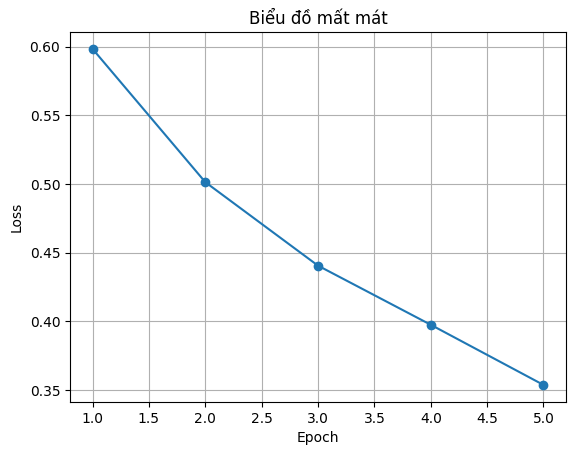

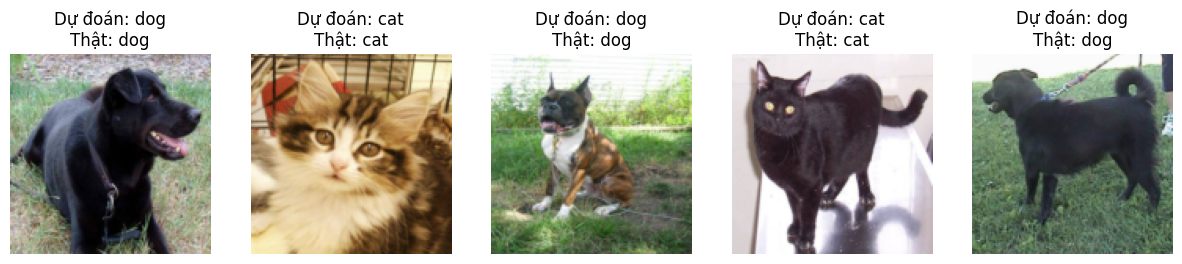

In [21]:
import os
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# ---------------- 1. Chia dữ liệu ----------------
def prepare_data(source_dir="dogs-vs-cats/train/train", target_dir="data/train"):
    os.makedirs(f"{target_dir}/cat", exist_ok=True)
    os.makedirs(f"{target_dir}/dog", exist_ok=True)
    for filename in os.listdir(source_dir):
        if filename.startswith("cat"):
            shutil.copy(os.path.join(source_dir, filename), f"{target_dir}/cat/{filename}")
        elif filename.startswith("dog"):
            shutil.copy(os.path.join(source_dir, filename), f"{target_dir}/dog/{filename}")
    print("\u2705 Đã chia ảnh vào thư mục cat/ và dog/")

prepare_data()

# ---------------- 2. Biến đổi và DataLoader ----------------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_dataset = datasets.ImageFolder("data/train", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
classes = train_dataset.classes  # ['cat', 'dog']

# ---------------- 3. Mô hình CNN ----------------
class CatDogCNN(nn.Module):
    def __init__(self):
        super(CatDogCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)     # 128x128 -> 126x126
        self.pool = nn.MaxPool2d(2, 2)                   # 126x126 -> 63x63
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)    # 63x63 -> 61x61
        self.fc1 = nn.Linear(32 * 30 * 30, 2)            # 61x61 -> pool -> 30x30

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 30 * 30)
        x = self.fc1(x)
        return x

# ---------------- 4. Huấn luyện ----------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CatDogCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

loss_values = []
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# ---------------- 5. Biểu đồ Loss ----------------
plt.plot(range(1, 6), loss_values, marker='o')
plt.title("Biểu đồ mất mát")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ---------------- 6. Trực quan dự đoán ----------------
def visualize_prediction():
    model.eval()
    images, labels = next(iter(train_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    for i in range(5):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = (img * 0.5) + 0.5
        axes[i].imshow(img)
        axes[i].set_title(f"Dự đoán: {classes[predicted[i]]}\nThật: {classes[labels[i]]}")
        axes[i].axis('off')
    plt.show()

visualize_prediction()

# CÂU 4: SỬ DỤNG NAIVE BAYES CHO TẬP DỮ LIỆU SAU: 

| Day | Outlook  | Temperature | Humidity | Wind  | Play |
|-----|----------|-------------|----------|-------|------|
| 1   | Sunny    | Hot         | High     | False | No   |
| 2   | Sunny    | Hot         | High     | True  | No   |
| 3   | Overcast | Hot         | High     | False | Yes  |
| 4   | Rainy    | Mild        | High     | False | Yes  |
| 5   | Rainy    | Cool        | Normal   | False | Yes  |
| 6   | Rainy    | Cool        | Normal   | True  | No   |
| 7   | Overcast | Cool        | Normal   | True  | Yes  |
| 8   | Sunny    | Mild        | High     | False | No   |
| 9   | Sunny    | Cool        | Normal   | False | Yes  |
| 10  | Rainy    | Mild        | Normal   | False | Yes  |
| 11  | Sunny    | Mild        | Normal   | True  | Yes  |
| 12  | Overcast | Mild        | High     | True  | Yes  |
| 13  | Overcast | Hot         | Normal   | False | Yes  |
| 14  | Rainy    | Mild        | High     | True  | No   |

YÊU CẦU : Xây dựng mô hình Naive Bayes để dự đoán nhãn Play (Yes/No) dựa trên các đặc trưng: Outlook, Temperature, Humidity, và Wind

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dữ liệu ban đầu
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["False", "True", "False", "False", "False", "True", "True", "False", "False", "False", "True", "True", "False", "True"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}
df = pd.DataFrame(data)

# Mã hóa từng cột
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Tách đặc trưng và nhãn
X = df.drop("Play", axis=1)
y = df["Play"]

# Chia tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["No", "Yes"]))


Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

